In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Setting up parameters

In [32]:
CAPTURE_FRAMES = 100
ERODE_SIZE = 2
LIVE_CAPTURE = False
IMG_PATH = "images/Indecent.jpg"

### Capturing a frame

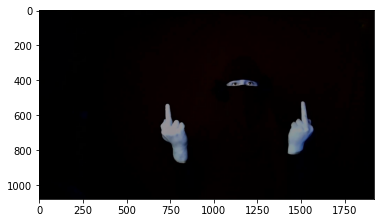

In [33]:
if not LIVE_CAPTURE:
    frame = cv2.imread(IMG_PATH)
    plt.imshow(frame)

In [34]:
if LIVE_CAPTURE:
    cam = cv2.VideoCapture(0)
    ret, frame = cam.read()
    cam.release()
    plt.imshow(frame)

### Making sure we have a frame

In [35]:
if LIVE_CAPTURE and not ret:
    print("failed to grab frame")

### Converting image to Black and White

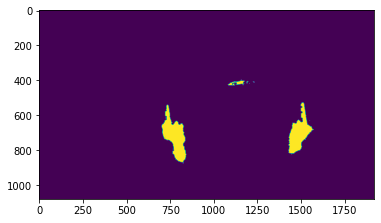

In [43]:
grayImage = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
(thresh, hand_mask) = cv2.threshold(grayImage, 80, 255, cv2.THRESH_BINARY)
plt.imshow(hand_mask)

### Finding contours in image

In [44]:
contours, _ = cv2.findContours(hand_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contour_masked = hand_mask.copy()

### Extracting hand sized contours

In [45]:
hands = []
for contour in contours:
    if 4000 <= cv2.contourArea(contour):
        cv2.drawContours(frame, [contour], 0, (127, 127, 127), 3)
        hull_shape = cv2.convexHull(contour, returnPoints=True)
        
        hull = cv2.convexHull(contour, returnPoints=False)

        cv2.drawContours(frame, [hull_shape], 0, (100, 100, 100), 3)
        
        for point in contour:
            if not(point[0] in hull):
#                 print(point)
#                 print(tuple(point[0]))
                cv2.circle(frame, tuple(point[0]), 5, [0, 0, 200], -1)
        print("Reached")
        defects = cv2.convexityDefects(contour, hull)
        for point in defects:
            # print(point[0, 3])
            if point[0, 3] > 500:
                defect = tuple(contour[point[0, 2]][0])
                start = tuple(contour[point[0, 0]][0])
                end = tuple(contour[point[0, 1]][0])
                dist = np.sqrt((start[0] - end[0])**2 + (start[1] - end[1])**2)
                print(f"norm{dist}")
                if dist > 3:
                    # print(defect)
                    cv2.line(frame, start, end, [255, 0, 0], 5)
                    cv2.circle(frame, defect, 5, [0, 0, 255], -1)
        hands.append(cv2.boundingRect(contour))



Reached
norm115.20850663036997
norm33.13608305156178
norm18.973665961010276
norm134.33167906342868
norm18.027756377319946
norm18.027756377319946
norm23.706539182259394
norm14.142135623730951
norm80.15609770940699
norm65.37583651472461
norm135.60235986147143
Reached
norm122.65398485169571
norm73.49829930005184
norm18.027756377319946
norm56.00892785976178
norm14.0
norm14.317821063276353
norm13.92838827718412
norm40.70626487409524
norm127.02755606560333
norm154.72879499304582


### Displaying Extracted images

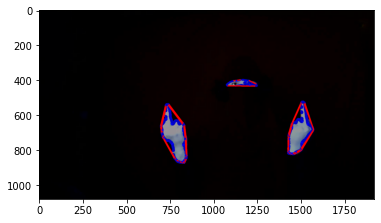

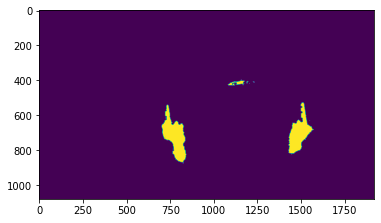

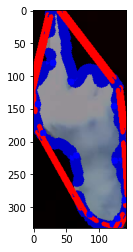

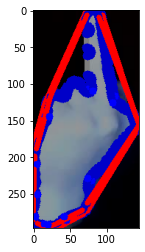

In [46]:
plt.figure()
plt.imshow(frame)

plt.figure()
plt.imshow(contour_masked)
for hand_index in range(len(hands)):
    x, y, w, h = hands[hand_index]
    plt.figure()
    print()
    plt.imshow(frame[y:y+h, x:x+w])